# **Data Visualization Lab**


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


In [53]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2020-12-06 23:14:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.5’

m4_survey_data.sqli 100%[===================>]  34.98M  8.10MB/s    in 6.0s    

2020-12-06 23:14:42 (5.86 MB/s) - ‘m4_survey_data.sqlite.5’ saved [36679680/36679680]



In [54]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite.1") # open a database connection

In [55]:
import pandas as pd
c = conn.cursor()
query = "SELECT name from sqlite_master where type='table'"
c.execute(query).fetchall()

[('EduOther',),
 ('DevType',),
 ('LastInt',),
 ('JobFactors',),
 ('WorkPlan',),
 ('WorkChallenge',),
 ('LanguageWorkedWith',),
 ('LanguageDesireNextYear',),
 ('DatabaseWorkedWith',),
 ('DatabaseDesireNextYear',),
 ('PlatformWorkedWith',),
 ('PlatformDesireNextYear',),
 ('WebFrameWorkedWith',),
 ('WebFrameDesireNextYear',),
 ('MiscTechWorkedWith',),
 ('MiscTechDesireNextYear',),
 ('DevEnviron',),
 ('Containers',),
 ('SOVisitTo',),
 ('SONewContent',),
 ('Gender',),
 ('Sexuality',),
 ('Ethnicity',),
 ('master',)]

In [56]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [57]:
table_name = 'DevType'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DevType" (
"Respondent" INTEGER,
  "DevType" TEXT
)


## Visualizing distribution of data


### Histograms


<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

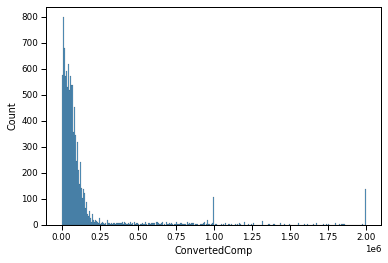

In [58]:
import seaborn as sns
query = """SELECT ConvertedComp FROM master"""
df_concomp = pd.read_sql_query(query,conn)
sns.histplot(df_concomp['ConvertedComp'])

### Box Plots


<AxesSubplot:xlabel='Age'>

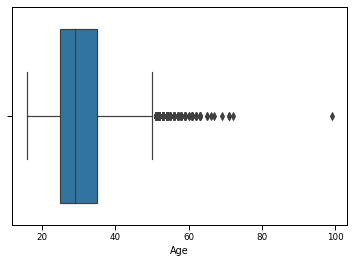

In [59]:
query = """SELECT Age FROM master"""
df_age = pd.read_sql_query(query,conn)
sns.boxplot(x=df_age['Age'])

## Visualizing relationships in data


### Scatter Plots


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

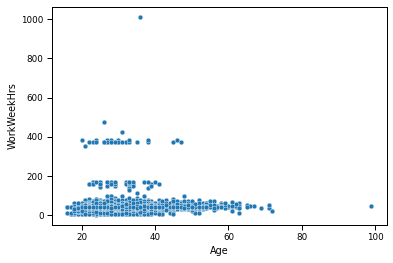

In [60]:
query_1 =  """SELECT WorkWeekHrs,Age FROM master"""
df_sp_1 = pd.read_sql_query(query_1,conn)
sns.scatterplot(x=df_sp_1['Age'],y=df_sp_1['WorkWeekHrs'])

### Bubble Plots


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

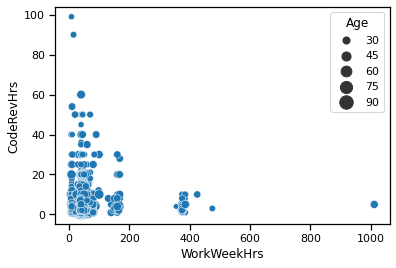

In [61]:
query = """SELECT WorkWeekHrs,Age,CodeRevHrs FROM master"""
df_bp = pd.read_sql_query(query,conn)
sns.set_context('notebook')
sns.scatterplot(x="WorkWeekHrs", 
                y="CodeRevHrs",
                size="Age",sizes=(20,200),            
                data=df_bp)

## Visualizing composition of data


### Pie Charts


([<matplotlib.patches.Wedge at 0x7fc35fb2eb38>,
 [Text(0.8180273501303621, 0.8082890908819061, 'MySQL'),
  Text(-0.6915220289773018, 0.9188565086231452, 'SQLite'),
  Text(-1.0874418565681885, -0.3741259261044753, 'PostgreSQL'),
  Text(-0.05599803362419166, -1.1486358083527712, 'Redis'),
  Text(1.0012190426194774, -0.5657388343539245, 'Firebase')])

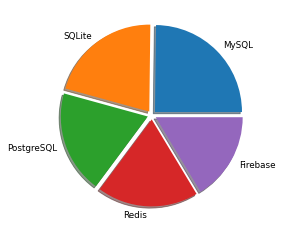

In [62]:
query = """SELECT * FROM DatabaseDesireNextYear"""
df_pc = pd.read_sql_query(query,conn)
sns.set_context('paper')
values = df_pc['DatabaseDesireNextYear'].value_counts()
labels = df_pc['DatabaseDesireNextYear'].unique()
import matplotlib.pyplot as plt
plt.pie(values[0:5],labels=labels[0:5],shadow=True,explode=(0.05,0.05,0.05,0.05,0.05))  #Pie chart for the top 5 
#databases that respondents wish to learn next year

### Stacked Charts


In [63]:
query = """SELECT WorkWeekHrs, CodeRevHrs, Age FROM master where CodeRevHrs not in ('NaN') and WorkWeekHrs not in ('NaN')"""
df_sc = pd.read_sql_query(query, conn)
from statistics import median
ages = df_sc['Age']
width = 2

In [64]:
import numpy as np
ages_fin = []
for i in ages.unique():
    if (i>=30 and i<=35):
        ages_fin.append(i)
median_work = []
median_code = []
work=[]
code=[]
type(df_sc)

pandas.core.frame.DataFrame

In [80]:
median_work_fin = []
median_code_fin = []
median_data = df_sc.groupby('Age').median()
for i in ages_fin:
    median_work_fin.append(median_data['WorkWeekHrs'][i])
    median_code_fin.append(median_data['CodeRevHrs'][i])
median_code_fin

[4.0, 4.0, 4.0, 4.0, 4.0, 4.0]

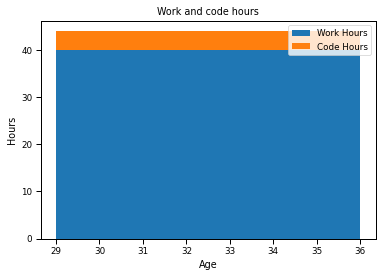

In [82]:

plt.bar(ages_fin, median_work_fin, width, label='Work Hours')
plt.bar(ages_fin, median_code_fin, width, bottom=median_work_fin, label='Code Hours')

plt.xlabel('Age')
plt.ylabel('Hours')
plt.title('Work and code hours')
plt.legend(loc='upper right')
plt.show()

## Visualizing comparison of data


### Line Chart


[45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0]


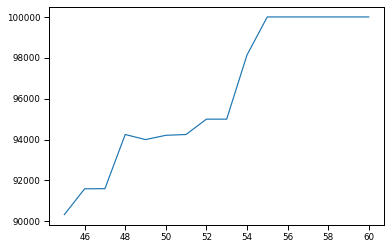

In [42]:
query = """SELECT ConvertedComp, Age FROM master where Age not in ('NaN') and ConvertedComp not in ('NaN') order by Age"""
df_lc = pd.read_sql_query(query, conn)
ages = df_lc['Age'].unique()
ages_fin = []
for i in ages:
    if (i>=45 and i<=60):
        ages_fin.append(i)
median_comp = []
comp = []
print(ages_fin)
for i in ages_fin:
    for j in range(0,len(df_lc)):
        if df_lc['Age'][j]==i:
            comp.append(df_lc['ConvertedComp'][j])
    comp_array=np.array(comp)
    median_comp.append(median(comp_array))
plt.plot(ages_fin,median_comp)  #Median ConvertedComp for ages between 45 and 60

### Bar Chart


I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: MainBranch, dtype: int64


<BarContainer object of 2 artists>

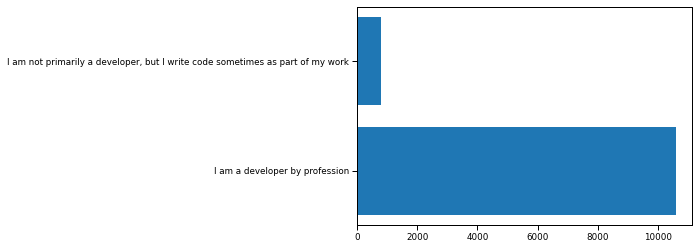

In [43]:
query = """SELECT MainBranch FROM master"""
df_main_branch = pd.read_sql_query(query,conn)
unique = df_main_branch['MainBranch'].unique()
values = df_main_branch['MainBranch'].value_counts()
print(values)
plt.barh(unique,values)  #Bar chart representing the count in the different branches 

In [44]:
conn.close()  #Closing the connection to the sql server 